<a href="https://colab.research.google.com/github/TomoharuKurosu/Tomoaharu_Kurosu_2023/blob/main/100%E5%B9%B4%E3%81%AB%E4%B8%80%E5%BA%A6_%E6%A0%AA%E4%BE%A1%E5%A4%89%E5%8C%96%E7%8E%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


Mounted at /content/drive


In [3]:
#データの読み込み 後で変更
df = pd.read_csv("/content/drive/MyDrive/rate_of_change_kurosu_200509.csv")

In [4]:
print(df)

       date  rate_of_change_raw  rate_of_change_minus  rate_of_change100
0    202312             -0.0158                0.0158           100.0158
1    202311              0.0538               -0.0538            99.9462
2    202310             -0.0300                0.0300           100.0300
3    202309             -0.0037                0.0037           100.0037
4    202308              0.0041               -0.0041            99.9959
..      ...                 ...                   ...                ...
215  200601              0.0370               -0.0370            99.9630
216  200512              0.0739               -0.0739            99.9261
217  200511              0.0633               -0.0633            99.9367
218  200510              0.0230               -0.0230            99.9770
219  200509              0.1109               -0.1109            99.8891

[220 rows x 4 columns]


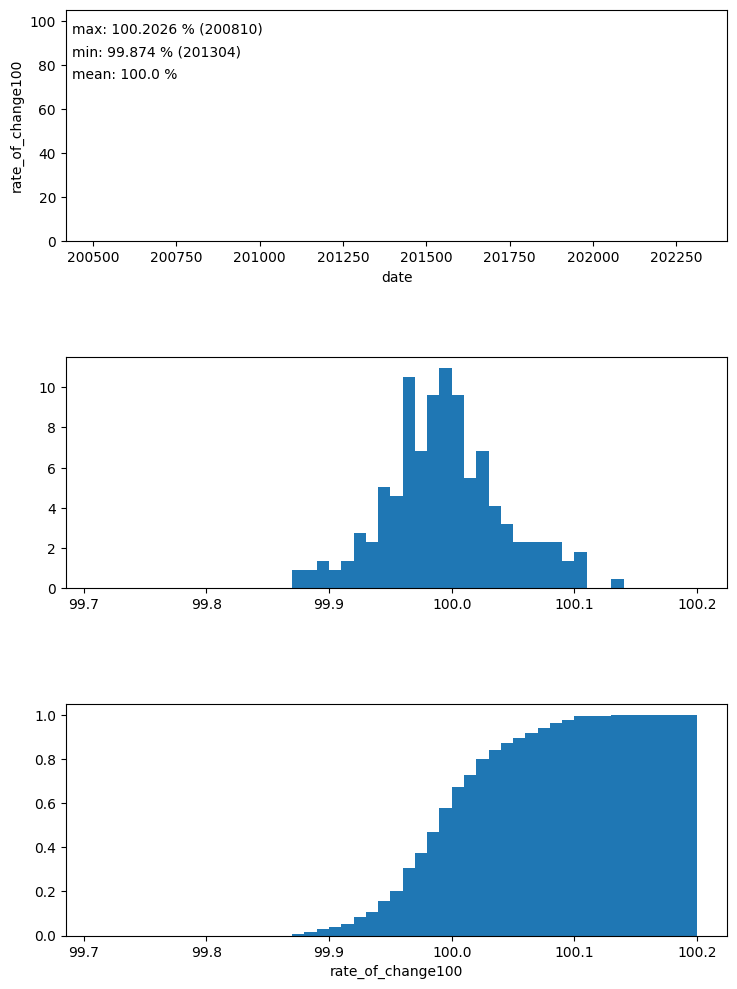

In [5]:
import matplotlib.pyplot as plt
import numpy as np

date = df["date"].values
rate_of_change100 = df["rate_of_change100"].values

# ndarrayに変換
date = np.array(date)
rate_of_change100 = np.array(rate_of_change100)

#------------------------------------------------------------------------------
# --- プロット
# 全般の設定
fig = plt.figure(figsize=(210/25.4, 294/25.4), dpi=100)
out_fig_path = 'histogram.png'

# プロット枠の設定
ax01 = fig.add_axes([0.10, 0.70, 0.80, 0.20])
ax02 = fig.add_axes([0.10, 0.40, 0.80, 0.20])
ax03 = fig.add_axes([0.10, 0.10, 0.80, 0.20])

# --- plot 1
# 年最大日降水量を西暦毎にバーグラフで表示
ax01.bar(date, rate_of_change100)

ax01.set_xlabel('date')
ax01.set_ylabel('rate_of_change100')

# グラフ上に最大値、最小値、平均値を表示
fig.text(0.01, 0.9, f'max: {rate_of_change100.max()} % ({date[np.argmax(rate_of_change100)]})', transform=ax01.transAxes)
fig.text(0.01, 0.8, f'min: {rate_of_change100.min()} % ({date[np.argmin(rate_of_change100)]})', transform=ax01.transAxes)
fig.text(0.01, 0.7, f'mean: {rate_of_change100.mean():.1f} %', transform=ax01.transAxes)

# --- plot 2 と plot 3
# bin のためのリストを作成する
bins = [99.7+0.01*(i+1) for i in range(int((rate_of_change100.max()-99.7)/0.01))]

# ヒストグラムを表示
ax02.hist(rate_of_change100, bins=bins, density=True)
#ax02.set_xlim(99, 101)


# 累積ヒストグラムを表示
ax03.hist(rate_of_change100, bins=bins, cumulative=True, density=True)
ax03.set_xlabel('rate_of_change100')

#------------------------------------------------------------------------------
# --- 図の保存
plt.savefig(out_fig_path, transparent=False)
#ここまで変更済み

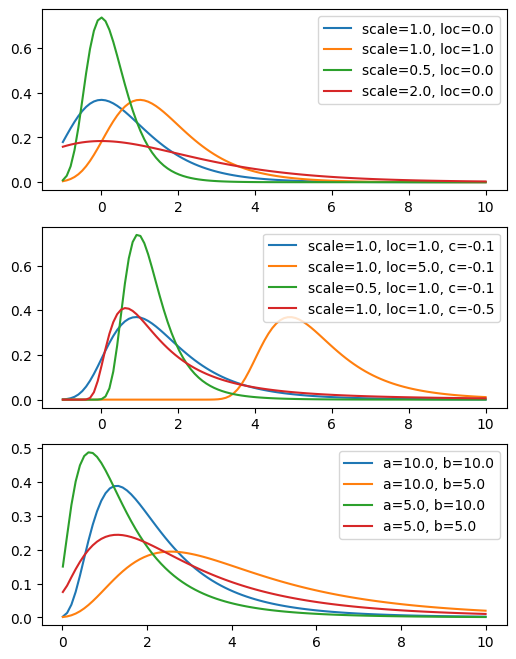

In [6]:
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as ss

# --- パラメータの設定
# - Gumbel分布
scale_gumbel = [1.0, 1.0, 0.5, 2.0]
loc_gumbel = [0.0, 1.0, 0.0, 0.0]

# - 一般化極値 (GEV) 分布
scale_gev = [1.0, 1.0, 0.5, 1.0]
loc_gev = [1.0, 5.0, 1.0, 1.0]
c_gev = [-0.1, -0.1, -0.1, -0.5]

# - 平方根指数型最大値分布
a_sqet = [10.0, 10.0, 5.0, 5.0]
b_sqet = [10.0, 5.0, 10.0, 5.0]

# --- 平方根指数型最大値分布の関数
def sqet(x, a, b):
    f = a*b*0.5*np.exp(-np.sqrt(b*x)-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
    return f

# --- 全般の設定
fig = plt.figure(figsize=(6, 8), dpi=100)

ax01 = fig.add_subplot(3, 1, 1)
ax02 = fig.add_subplot(3, 1, 2)
ax03 = fig.add_subplot(3, 1, 3)

x = np.linspace(-1, 10, 110)
for i in range(len(scale_gumbel)):
    rv = ss.gumbel_r.pdf(x, loc=loc_gumbel[i], scale=scale_gumbel[i])
    ax01.plot(x, rv, label=f"scale={scale_gumbel[i]}, loc={loc_gumbel[i]}")

ax01.legend()

for i in range(len(scale_gev)):
    rv = ss.genextreme.pdf(x, c=c_gev[i], loc=loc_gev[i], scale=scale_gev[i])
    ax02.plot(x, rv, label=f"scale={scale_gev[i]}, loc={loc_gev[i]}, c={c_gev[i]}")

ax02.legend()

for i in range(len(a_sqet)):
    rv = sqet(x=x[x>=0], a=a_sqet[i], b=b_sqet[i])
    ax03.plot(x[x>=0], rv, label=f"a={a_sqet[i]}, b={b_sqet[i]}")

ax03.legend()

plt.show()

<ipython-input-7-4ef15d8a2e80>:22: RuntimeWarning: overflow encountered in double_scalars
  a = (np.sum(sqbx) -2.0*n) / np.sum(b*data*np.exp(-sqbx))
<ipython-input-7-4ef15d8a2e80>:25: RuntimeWarning: invalid value encountered in subtract
  L = L - a*(np.sum(np.exp(-sqbx)) + np.sum(sqbx*np.exp(-sqbx)))
<ipython-input-7-4ef15d8a2e80>:10: RuntimeWarning: overflow encountered in double_scalars
  f = a*b*0.5*np.exp(-np.sqrt(b*x)-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
<ipython-input-7-4ef15d8a2e80>:10: RuntimeWarning: overflow encountered in multiply
  f = a*b*0.5*np.exp(-np.sqrt(b*x)-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
<ipython-input-7-4ef15d8a2e80>:10: RuntimeWarning: invalid value encountered in multiply
  f = a*b*0.5*np.exp(-np.sqrt(b*x)-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
<ipython-input-7-4ef15d8a2e80>:14: RuntimeWarning: overflow encountered in multiply
  F = np.exp(-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))


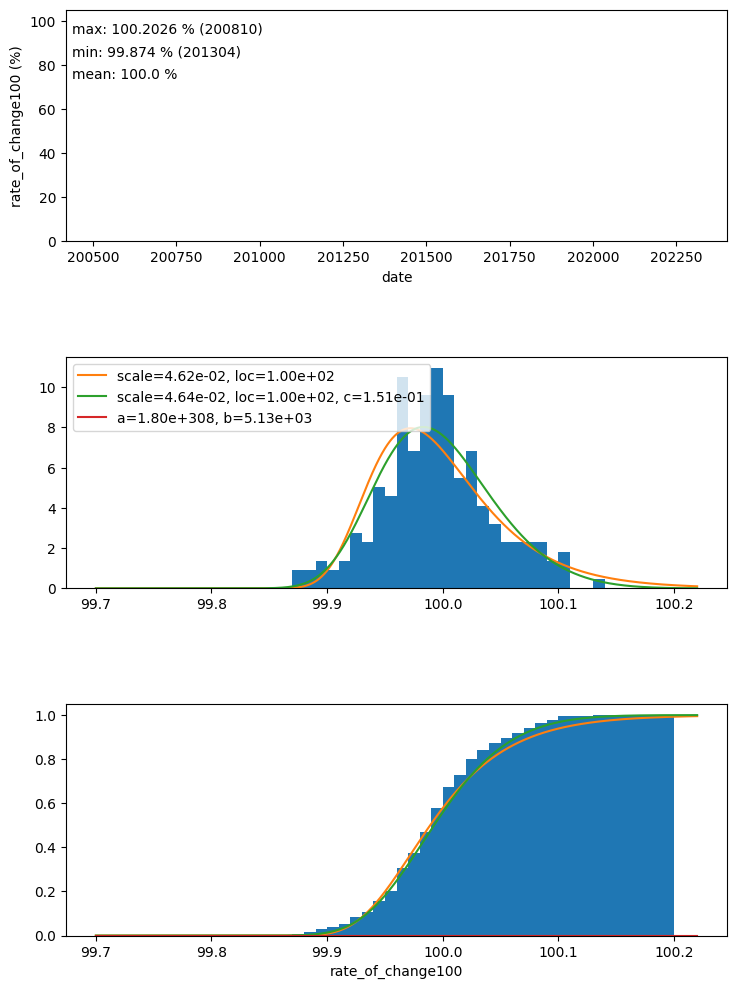

In [7]:
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as ss
from scipy.optimize import minimize

#-----------------------------------------------------------------------------
# --- 平方根指数型最大値分布の関数
def sqet(x, a, b):
    f = a*b*0.5*np.exp(-np.sqrt(b*x)-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
    return f

def sqet_cdf(x, a, b):
    F = np.exp(-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
    return F

# SQETの対数尤度関数 (にマイナスをつけたもの)
def mL_sqet(b, data):
    n = len(data)

    sqbx = np.sqrt(b*data)
    a = (np.sum(sqbx) -2.0*n) / np.sum(b*data*np.exp(-sqbx))

    L = n*np.log(a) + n*np.log(b) -n*np.log(2) - np.sum(sqbx)
    L = L - a*(np.sum(np.exp(-sqbx)) + np.sum(sqbx*np.exp(-sqbx)))
    return -L

# bからaを求める式
def b2a_sqet(b, data):
    n = len(data)
    sqbx = np.sqrt(b*data)
    a = (np.sum(sqbx) -2.0*n) / np.sum(b*data*np.exp(-sqbx))
    return a

#------------------------------------------------------------------------------
# データの読み込み
#year = []
#annual_max_daily_prcp = []
#i = 0
#with open('data.csv', 'r') as fin:
#    for line in fin:
#        if i > 1:
#            data = line.split(',')
#            year.append(int(data[0]))
#            annual_max_daily_prcp.append(float(data[1].replace(']', '')))
#        i += 1

# ndarrayに変換
#year = np.array(year)
#annual_max_daily_prcp = np.array(annual_max_daily_prcp)

#------------------------------------------------------------------------------
# --- プロット
# 全般の設定
fig = plt.figure(figsize=(210/25.4, 294/25.4), dpi=100)
out_fig_path = 'histogram-and-fitted-pdf.png'

# プロット枠の設定
ax01 = fig.add_axes([0.10, 0.70, 0.80, 0.20])
ax02 = fig.add_axes([0.10, 0.40, 0.80, 0.20])
ax03 = fig.add_axes([0.10, 0.10, 0.80, 0.20])

# --- plot 1
# 年最大日降水量を西暦毎にバーグラフで表示
ax01.bar(date, rate_of_change100)

ax01.set_xlabel('date')
ax01.set_ylabel('rate_of_change100 (%)')

# グラフ上に最大値、最小値、平均値を表示
fig.text(0.01, 0.9, f'max: {rate_of_change100.max()} % ({date[np.argmax(rate_of_change100)]})', transform=ax01.transAxes)
fig.text(0.01, 0.8, f'min: {rate_of_change100.min()} % ({date[np.argmin(rate_of_change100)]})', transform=ax01.transAxes)
fig.text(0.01, 0.7, f'mean: {rate_of_change100.mean():.1f} %', transform=ax01.transAxes)

# --- plot 2 と plot 3
# Gumbel分布を当てはめる
loc_gumbel, scale_gumbel = ss.gumbel_r.fit(rate_of_change100, method='MLE')

# 一般化極値分布を当てはめる
c_gev, loc_gev, scale_gev = ss.genextreme.fit(rate_of_change100, method='MLE')

# 平方根指数型最大値分布を当てはめる 調べる
res = minimize(mL_sqet, x0=[100.0], args=rate_of_change100,
               bounds=[(0, None)], method='Nelder-Mead')
b_sqet = res.x[0]
a_sqet = b2a_sqet(b_sqet, rate_of_change100)

gbl = ss.gumbel_r(loc=loc_gumbel, scale=scale_gumbel)
gev = ss.genextreme(c=c_gev, loc=loc_gev, scale=scale_gev)

# bin, x のためのリストを作成する
#bins = [0.01*(i+1) for i in range(int(rate_of_change100.max()/0.01))]
bins = [99.7+0.01*(i+1) for i in range(int((rate_of_change100.max()-99.7)/0.01))]
x = np.linspace(99.7, 0.01*(int(rate_of_change100.max()/0.01) + 2), 20*int((rate_of_change100.max()-99.7)/0.01) + 1)


# ヒストグラムを表示
ax02.hist(rate_of_change100, bins=bins, density=True)

# 当てはめた分布をプロット
ax02.plot(x, gbl.pdf(x), label=f"scale={scale_gumbel:.2e}, loc={loc_gumbel:.2e}")
ax02.plot(x, gev.pdf(x), label=f"scale={scale_gev:.2e}, loc={loc_gev:.2e}, c={c_gev:.2e}")
ax02.plot(x, sqet(x, a_sqet, b_sqet), label=f"a={a_sqet:.2e}, b={b_sqet:.2e}")

ax02.legend()

# 累積ヒストグラムを表示
ax03.hist(rate_of_change100, bins=bins, cumulative=True, density=True)
ax03.plot(x, gbl.cdf(x))
ax03.plot(x, gev.cdf(x))
ax03.plot(x, sqet_cdf(x, a_sqet, b_sqet))

ax03.set_xlabel('rate_of_change100')

#------------------------------------------------------------------------------
# --- 図の保存
plt.savefig(out_fig_path, transparent=False)

<ipython-input-8-e74b721d208e>:22: RuntimeWarning: divide by zero encountered in double_scalars
  a = (np.sum(sqbx) -2.0*n) / np.sum(b*data*np.exp(-sqbx))
<ipython-input-8-e74b721d208e>:25: RuntimeWarning: invalid value encountered in double_scalars
  L = L - a*(np.sum(np.exp(-sqbx)) + np.sum(sqbx*np.exp(-sqbx)))
<ipython-input-8-e74b721d208e>:22: RuntimeWarning: overflow encountered in double_scalars
  a = (np.sum(sqbx) -2.0*n) / np.sum(b*data*np.exp(-sqbx))
<ipython-input-8-e74b721d208e>:25: RuntimeWarning: invalid value encountered in subtract
  L = L - a*(np.sum(np.exp(-sqbx)) + np.sum(sqbx*np.exp(-sqbx)))
<ipython-input-8-e74b721d208e>:10: RuntimeWarning: overflow encountered in double_scalars
  f = a*b*0.5*np.exp(-np.sqrt(b*x)-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
<ipython-input-8-e74b721d208e>:10: RuntimeWarning: overflow encountered in multiply
  f = a*b*0.5*np.exp(-np.sqrt(b*x)-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
<ipython-input-8-e74b721d208e>:10: RuntimeWarning:

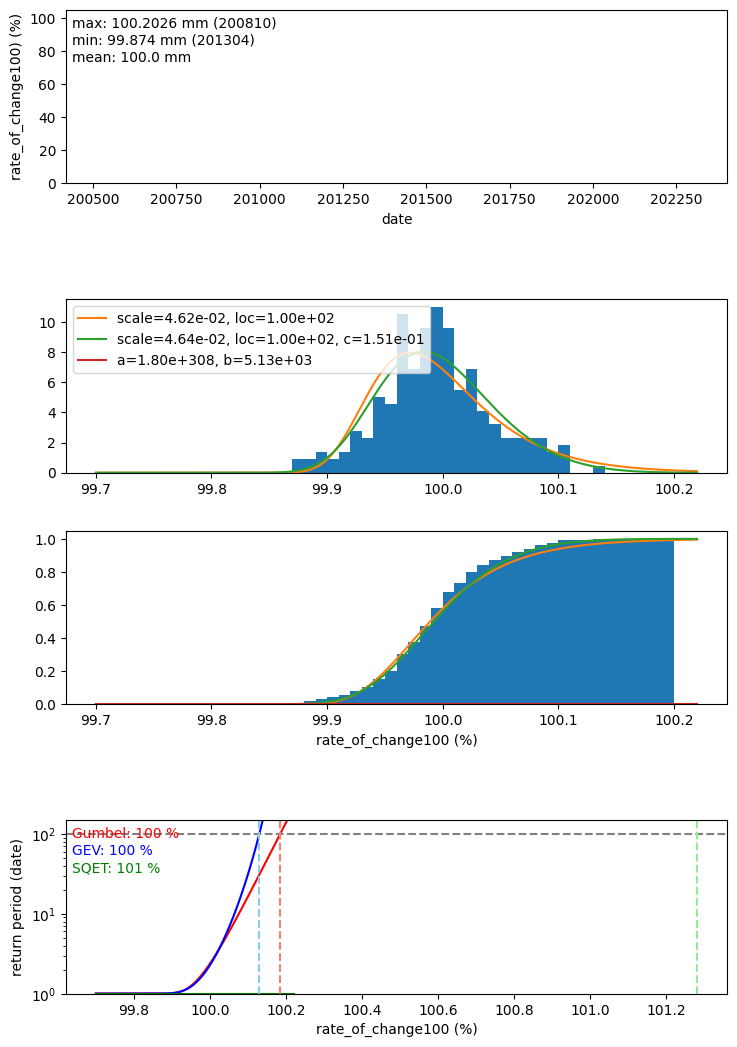

In [8]:
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as ss
from scipy.optimize import minimize, root_scalar

#-----------------------------------------------------------------------------
# --- 平方根指数型最大値分布の関数
def sqet(x, a, b):
    f = a*b*0.5*np.exp(-np.sqrt(b*x)-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
    return f

def sqet_cdf(x, a, b):
    F = np.exp(-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
    return F

# SQETの対数尤度関数 (にマイナスをつけたもの)
def mL_sqet(b, data):
    n = len(data)

    sqbx = np.sqrt(b*data)
    a = (np.sum(sqbx) -2.0*n) / np.sum(b*data*np.exp(-sqbx))

    L = n*np.log(a) + n*np.log(b) -n*np.log(2) - np.sum(sqbx)
    L = L - a*(np.sum(np.exp(-sqbx)) + np.sum(sqbx*np.exp(-sqbx)))
    return -L

# bからaを求める式
def b2a_sqet(b, data):
    n = len(data)
    sqbx = np.sqrt(b*data)
    a = (np.sum(sqbx) -2.0*n) / np.sum(b*data*np.exp(-sqbx))
    return a


#------------------------------------------------------------------------------
# --- プロット
# 全般の設定
fig = plt.figure(figsize=(210/25.4, 294/25.4), dpi=100)
out_fig_path = 'histogram-and-fitted-pdf-mod.png'

# プロット枠の設定
ax01 = fig.add_axes([0.10, 0.80, 0.80, 0.15])
ax02 = fig.add_axes([0.10, 0.55, 0.80, 0.15])
ax03 = fig.add_axes([0.10, 0.35, 0.80, 0.15])
ax04 = fig.add_axes([0.10, 0.10, 0.80, 0.15])

# --- plot 1
# 年最大日降水量を西暦毎にバーグラフで表示
ax01.bar(date, rate_of_change100)

ax01.set_xlabel('date')
ax01.set_ylabel('rate_of_change100) (%)')

# グラフ上に最大値、最小値、平均値を表示
fig.text(0.01, 0.9, f'max: {rate_of_change100.max()} mm ({date[np.argmax(rate_of_change100)]})', transform=ax01.transAxes)
fig.text(0.01, 0.8, f'min: {rate_of_change100.min()} mm ({date[np.argmin(rate_of_change100)]})', transform=ax01.transAxes)
fig.text(0.01, 0.7, f'mean: {rate_of_change100.mean():.1f} mm', transform=ax01.transAxes)

# --- plot 2 と plot 3
# Gumbel分布を当てはめる
loc_gumbel, scale_gumbel = ss.gumbel_r.fit(rate_of_change100, method='MLE')

# 一般化極値分布を当てはめる
c_gev, loc_gev, scale_gev = ss.genextreme.fit(rate_of_change100, method='MLE')

# 平方根指数型最大値分布を当てはめる
res = minimize(mL_sqet, x0=[1.0], args=rate_of_change100,
               bounds=[(0, None)], method='Nelder-Mead')
b_sqet = res.x[0]
a_sqet = b2a_sqet(b_sqet, rate_of_change100)

gbl = ss.gumbel_r(loc=loc_gumbel, scale=scale_gumbel)
gev = ss.genextreme(c=c_gev, loc=loc_gev, scale=scale_gev)

# bin, x のためのリストを作成する
#bins = [10*(i+1) for i in range(intrate_of_change100.max()/10) + 1)]
#x = np.linspace(0.0, 10.0*(int(rate_of_change100.max()/10) + 1), 20*int(rate_of_change100.max()/10) + 1)
bins = [99.7+0.01*(i+1) for i in range(int((rate_of_change100.max()-99.7)/0.01))]
x = np.linspace(99.7, 0.01*(int(rate_of_change100.max()/0.01) + 2), 20*int((rate_of_change100.max()-99.7)/0.01) + 1)

# ヒストグラムを表示
ax02.hist(rate_of_change100, bins=bins, density=True)

# 当てはめた分布をプロット
ax02.plot(x, gbl.pdf(x), label=f"scale={scale_gumbel:.2e}, loc={loc_gumbel:.2e}")
ax02.plot(x, gev.pdf(x), label=f"scale={scale_gev:.2e}, loc={loc_gev:.2e}, c={c_gev:.2e}")
ax02.plot(x, sqet(x, a_sqet, b_sqet), label=f"a={a_sqet:.2e}, b={b_sqet:.2e}")

ax02.legend()

# 累積ヒストグラムを表示
ax03.hist(rate_of_change100, bins=bins, cumulative=True, density=True)
ax03.plot(x, gbl.cdf(x))
ax03.plot(x, gev.cdf(x))
ax03.plot(x, sqet_cdf(x, a_sqet, b_sqet))

ax03.set_xlabel('rate_of_change100 (%)')

# --- plot 4
# 再現期間と確率降水量のプロット
ax04.plot(x, 1.0/(1.0-gbl.cdf(x)), color='red')
ax04.plot(x, 1.0/(1.0-gev.cdf(x)), color='blue')
ax04.plot(x, 1.0/(1.0-sqet_cdf(x, a_sqet, b_sqet)), color='green')

ax04.set_yscale('log')
ax04.set_ylim(1, 150)
ax04.set_xlabel('rate_of_change100 (%)')
ax04.set_ylabel('return period (date)')

# 確率降水量の値を求める式
# Gumbel分布
def pp_gumbel(scale, loc, T):
    p = 1.0 - 1.0/T
    x = loc - scale*np.log(-np.log(p))

    return x

# 一般化極値分布
def pp_gev(c, scale, loc, T):
    p = 1.0 - 1.0/T
    x = loc + scale/c*(1.0-(-np.log(p))**c)

    return x

# 平方根指数型最大値分布
def pp_sqet(a, b, T):
    p = 1.0 - 1.0/T

    def f(t):
        return np.log(1.0 + t) - t - np.log(-1.0/a*np.log(p))

    sol = root_scalar(f=f, method='newton', x0=100.0)
    x = sol.root**2/b

    return x

# 再現期間100年の確率降水量を算出し、線を引く
ax04.axhline(100.0, color='gray', linestyle='dashed')
ax04.axvline([pp_gumbel(scale_gumbel, loc_gumbel, 100.0)], color='salmon', linestyle='dashed')
ax04.axvline([pp_gev(c_gev, scale_gev, loc_gev, 100.0)], color='skyblue', linestyle='dashed')
ax04.axvline([pp_sqet(a_sqet, b_sqet, 100.0)], color='lightgreen', linestyle='dashed')

# グラフ上に再現期間50年の確率降水量の値を書く
fig.text(0.01, 0.9, f'Gumbel: {pp_gumbel(scale_gumbel, loc_gumbel, 100.0):.0f} %', color='red', transform=ax04.transAxes)
fig.text(0.01, 0.8, f'GEV: {pp_gev(c_gev, scale_gev, loc_gev, 100.0):.0f} %', color='blue', transform=ax04.transAxes)
fig.text(0.01, 0.7, f'SQET: {pp_sqet(a_sqet, b_sqet, 100.0):.0f} %', color='green', transform=ax04.transAxes)

#------------------------------------------------------------------------------
# --- 図の保存
plt.savefig(out_fig_path, transparent=False)

<ipython-input-31-b7fbcb560c03>:50: RuntimeWarning: divide by zero encountered in double_scalars
  a = (np.sum(sqbx) -2.0*n) / np.sum(b*data*np.exp(-sqbx))
<ipython-input-31-b7fbcb560c03>:53: RuntimeWarning: invalid value encountered in double_scalars
  L = L - a*(np.sum(np.exp(-sqbx)) + np.sum(sqbx*np.exp(-sqbx)))
<ipython-input-31-b7fbcb560c03>:50: RuntimeWarning: overflow encountered in double_scalars
  a = (np.sum(sqbx) -2.0*n) / np.sum(b*data*np.exp(-sqbx))
<ipython-input-31-b7fbcb560c03>:53: RuntimeWarning: invalid value encountered in subtract
  L = L - a*(np.sum(np.exp(-sqbx)) + np.sum(sqbx*np.exp(-sqbx)))
<ipython-input-31-b7fbcb560c03>:38: RuntimeWarning: overflow encountered in double_scalars
  f = a*b*0.5*np.exp(-np.sqrt(b*x)-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
<ipython-input-31-b7fbcb560c03>:38: RuntimeWarning: overflow encountered in multiply
  f = a*b*0.5*np.exp(-np.sqrt(b*x)-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
<ipython-input-31-b7fbcb560c03>:38: RuntimeW

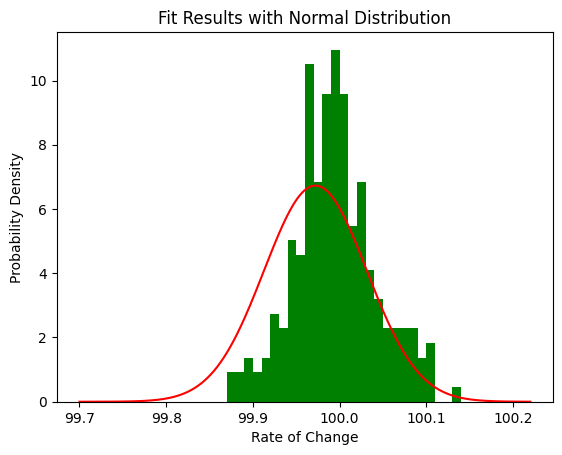

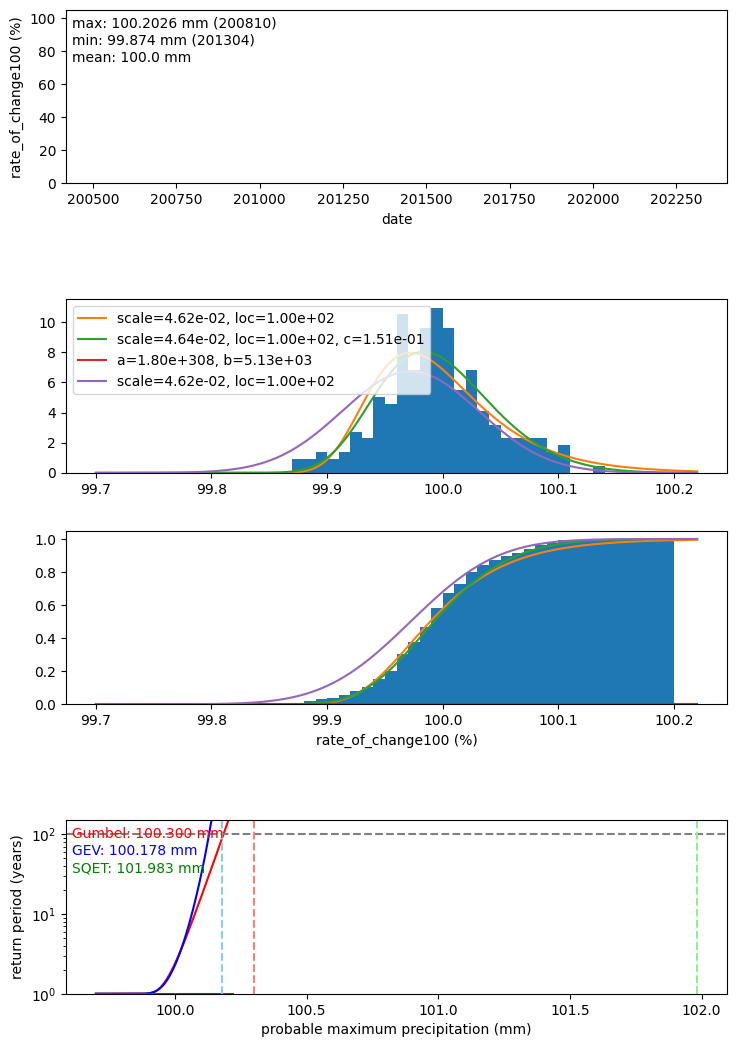

In [31]:
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as ss
from scipy.optimize import minimize, root_scalar
#正規分布　試し
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

# rate_of_change100データから正規分布のパラメータを推定
loc_gumbel, scale_gumbel = ss.gumbel_r.fit(rate_of_change100, method='MLE')

# 正規分布の平均と標準偏差に変換
mean_normal = loc_gumbel
std_normal = scale_gumbel * np.pi / np.sqrt(6)

# 正規分布の確率密度関数を生成
#正規x = np.linspace(min(rate_of_change100), max(rate_of_change100), 1000)
x = np.linspace(99.7, 0.01*(int(rate_of_change100.max()/0.01) + 2), 20*int((rate_of_change100.max()-99.7)/0.01) + 1)
normal_pdf = ss.norm.pdf(x, mean_normal, std_normal)

# rate_of_change100のヒストグラムと正規分布の確率密度関数を描画
plt.hist(rate_of_change100, bins=bins, density=True, color='g')
#plt.hist(rate_of_change100, bins=bins, density=True, alpha=0.6, color='g')
plt.plot(x, normal_pdf, 'r', label='Normal Distribution')

plt.title('Fit Results with Normal Distribution')
plt.xlabel('Rate of Change')
plt.ylabel('Probability Density')
#plt.legend()

#plt.show()

#-----------------------------------------------------------------------------
# --- 平方根指数型最大値分布の関数
def sqet(x, a, b):
    f = a*b*0.5*np.exp(-np.sqrt(b*x)-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
    return f

def sqet_cdf(x, a, b):
    F = np.exp(-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
    return F

# SQETの対数尤度関数 (にマイナスをつけたもの)
def mL_sqet(b, data):
    n = len(data)

    sqbx = np.sqrt(b*data)
    a = (np.sum(sqbx) -2.0*n) / np.sum(b*data*np.exp(-sqbx))

    L = n*np.log(a) + n*np.log(b) -n*np.log(2) - np.sum(sqbx)
    L = L - a*(np.sum(np.exp(-sqbx)) + np.sum(sqbx*np.exp(-sqbx)))
    return -L

# bからaを求める式
def b2a_sqet(b, data):
    n = len(data)
    sqbx = np.sqrt(b*data)
    a = (np.sum(sqbx) -2.0*n) / np.sum(b*data*np.exp(-sqbx))
    return a

#------------------------------------------------------------------------------
# --- プロット
# 全般の設定
fig = plt.figure(figsize=(210/25.4, 294/25.4), dpi=100)
out_fig_path = 'histogram-and-fitted-pdf-mod.png'

# プロット枠の設定
ax01 = fig.add_axes([0.10, 0.80, 0.80, 0.15])
ax02 = fig.add_axes([0.10, 0.55, 0.80, 0.15])
ax03 = fig.add_axes([0.10, 0.35, 0.80, 0.15])
ax04 = fig.add_axes([0.10, 0.10, 0.80, 0.15])

# --- plot 1
# 年最大日降水量を西暦毎にバーグラフで表示
ax01.bar(date, rate_of_change100)

ax01.set_xlabel('date')
ax01.set_ylabel('rate_of_change100 (%)')

# グラフ上に最大値、最小値、平均値を表示
fig.text(0.01, 0.9, f'max: {rate_of_change100.max()} mm ({date[np.argmax(rate_of_change100)]})', transform=ax01.transAxes)
fig.text(0.01, 0.8, f'min: {rate_of_change100.min()} mm ({date[np.argmin(rate_of_change100)]})', transform=ax01.transAxes)
fig.text(0.01, 0.7, f'mean: {rate_of_change100.mean():.1f} mm', transform=ax01.transAxes)

# --- plot 2 と plot 3
# Gumbel分布を当てはめる
loc_gumbel, scale_gumbel = ss.gumbel_r.fit(rate_of_change100, method='MLE')

# 一般化極値分布を当てはめる
c_gev, loc_gev, scale_gev = ss.genextreme.fit(rate_of_change100, method='MLE')

# 平方根指数型最大値分布を当てはめる
res = minimize(mL_sqet, x0=[1.0], args=rate_of_change100,
               bounds=[(0, None)], method='Nelder-Mead')
b_sqet = res.x[0]
a_sqet = b2a_sqet(b_sqet, rate_of_change100)

gbl = ss.gumbel_r(loc=loc_gumbel, scale=scale_gumbel)
gev = ss.genextreme(c=c_gev, loc=loc_gev, scale=scale_gev)

# bin, x のためのリストを作成する
#[10*(i+1) for i in range(int(rate_of_change100.max()/10) + 1)]
#x = np.linspace(0.0, 10.0*(int(rate_of_change100.max()/10) + 1), 20*int(annual_max_daily_prcp.max()/10) + 1)
bins = [99.7+0.01*(i+1) for i in range(int((rate_of_change100.max()-99.7)/0.01))]
x = np.linspace(99.7, 0.01*(int(rate_of_change100.max()/0.01) + 2), 20*int((rate_of_change100.max()-99.7)/0.01) + 1)

# ヒストグラムを表示
ax02.hist(rate_of_change100, bins=bins, density=True)

# 当てはめた分布をプロット
ax02.plot(x, gbl.pdf(x), label=f"scale={scale_gumbel:.2e}, loc={loc_gumbel:.2e}")
ax02.plot(x, gev.pdf(x), label=f"scale={scale_gev:.2e}, loc={loc_gev:.2e}, c={c_gev:.2e}")
ax02.plot(x, sqet(x, a_sqet, b_sqet), label=f"a={a_sqet:.2e}, b={b_sqet:.2e}")
ax02.plot(x, ss.norm.pdf(x, mean_normal, std_normal), label=f"scale={scale_gumbel:.2e}, loc={loc_gumbel:.2e}")
#ax02.plot(x, normal_pdf(x, mean_normal, std_normal), label=f"scale={scale_gumbel:.2e}, loc={loc_gumbel:.2e}")

ax02.legend()

# 累積ヒストグラムを表示
ax03.hist(rate_of_change100, bins=bins, cumulative=True, density=True)
ax03.plot(x, gbl.cdf(x))
ax03.plot(x, gev.cdf(x))
ax03.plot(x, sqet_cdf(x, a_sqet, b_sqet))
ax03.plot(x, ss.norm.cdf(x, mean_normal, std_normal))


ax03.set_xlabel('rate_of_change100 (%)')

# --- plot 4
# 再現期間と確率降水量のプロット
ax04.plot(x, 1.0/(1.0-gbl.cdf(x)), color='red')
ax04.plot(x, 1.0/(1.0-gev.cdf(x)), color='blue')
ax04.plot(x, 1.0/(1.0-sqet_cdf(x, a_sqet, b_sqet)), color='green')

ax04.set_yscale('log')
ax04.set_ylim(1, 150)
ax04.set_xlabel('probable maximum precipitation (mm)')
ax04.set_ylabel('return period (years)')

# 確率降水量の値を求める式
# Normal分布
# rate_of_change100データから正規分布のパラメータを推定
loc_gumbel, scale_gumbel = ss.gumbel_r.fit(rate_of_change100, method='MLE')

# 正規分布の平均と標準偏差に変換
mean_normal = loc_gumbel
std_normal = scale_gumbel * np.pi / np.sqrt(6)

# 正規分布の確率密度関数を定義
#def pp_normal(x):  これはppではない
#    return ss.norm.pdf(x, mean_normal, std_normal)

# データの範囲を取得
x = np.linspace(99.7, 0.01*(int(rate_of_change100.max()/0.01) + 2), 20*int((rate_of_change100.max()-99.7)/0.01) + 1)

# 正規分布の確率密度関数を計算
#pdf_normal = pp_normal(x)

#Normal分布２
#def

# Gumbel分布
def pp_gumbel(scale, loc, T):
    p = 1.0 - 1.0/T
    x = loc - scale*np.log(-np.log(p))

    return x

# 一般化極値分布
def pp_gev(c, scale, loc, T):
    p = 1.0 - 1.0/T
    x = loc + scale/c*(1.0-(-np.log(p))**c)

    return x

# 平方根指数型最大値分布
def pp_sqet(a, b, T):
    p = 1.0 - 1.0/T

    def f(t):
        return np.log(1.0 + t) - t - np.log(-1.0/a*np.log(p))

    sol = root_scalar(f=f, method='newton', x0=100.0)
    x = sol.root**2/b

    return x



# 再現期間50年の確率降水量を算出し、線を引く
ax04.axhline(100.0, color='gray', linestyle='dashed')
ax04.axvline([pp_gumbel(scale_gumbel, loc_gumbel, 1200.0)], color='salmon', linestyle='dashed')
ax04.axvline([pp_gev(c_gev, scale_gev, loc_gev, 1200.0)], color='skyblue', linestyle='dashed')
ax04.axvline([pp_sqet(a_sqet, b_sqet, 1200.0)], color='lightgreen', linestyle='dashed')

# グラフ上に再現期間50年の確率降水量の値を書く
#fig.text(0.01, 0.9, f'Gumbel: {pp_gumbel(scale_gumbel, loc_gumbel, 100.0):.0f} mm', color='red', transform=ax04.transAxes)
fig.text(0.01, 0.9, f'Gumbel: {pp_gumbel(scale_gumbel, loc_gumbel, 1200.0):.3f} mm', color='red', transform=ax04.transAxes)
fig.text(0.01, 0.8, f'GEV: {pp_gev(c_gev, scale_gev, loc_gev, 1200.0):.3f} mm', color='blue', transform=ax04.transAxes)
fig.text(0.01, 0.7, f'SQET: {pp_sqet(a_sqet, b_sqet, 1200.0):.3f} mm', color='green', transform=ax04.transAxes)



#------------------------------------------------------------------------------
# --- 図の保存
plt.savefig(out_fig_path, transparent=False)

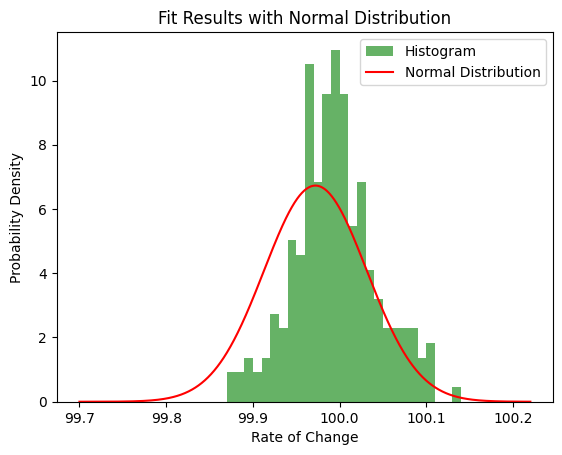

In [13]:
#正規分布　試し
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

# rate_of_change100データから正規分布のパラメータを推定
loc_gumbel, scale_gumbel = ss.gumbel_r.fit(rate_of_change100, method='MLE')

# 正規分布の平均と標準偏差に変換
mean_normal = loc_gumbel
std_normal = scale_gumbel * np.pi / np.sqrt(6)

# 正規分布の確率密度関数を生成
#正規x = np.linspace(min(rate_of_change100), max(rate_of_change100), 1000)
x = np.linspace(99.7, 0.01*(int(rate_of_change100.max()/0.01) + 2), 20*int((rate_of_change100.max()-99.7)/0.01) + 1)
pdf_normal = ss.norm.pdf(x, mean_normal, std_normal)

# rate_of_change100のヒストグラムと正規分布の確率密度関数を描画
plt.hist(rate_of_change100, bins=bins, density=True, alpha=0.6, color='g', label='Histogram')
plt.plot(x, pdf_normal, 'r', label='Normal Distribution')

plt.title('Fit Results with Normal Distribution')
plt.xlabel('Rate of Change')
plt.ylabel('Probability Density')
plt.legend()

plt.show()
